# Synthetic drifter trajectories exponentially autocorrelated velocities

We generate synthetic exponentially autocorrelated velocity timeseries.
Displacement and acceleration timeseries are derived.

We verify pure exponentially decorrelated timeseries are not differentiable and lead to white noise acceleration.
A modification leading to differentiable solutions is used and consists in (multi-layer) embeded Ornstein–Uhlenbeck (OU) processes [Sawford 1991, Viggiano et al. 2020].
All processes are assumed Gaussian and could be extended to more general distributions [Viggiano et al. 2020].

References:

- B. Viggiano, J. Friedrich, R. Volk, M. Bourgoin, R. B. Cal, and L. Chevillard. Modelling lagrangian velocity and acceleration in turbulent flows as infinitely differentiable stochastic processes. Journal of Fluid Mechanics, 900, 2020.
- B. Sawford. Reynolds number effects in lagrangian stochastic models of turbulent dispersion. Physics of Fluids A: Fluid Dynamics, 3(6):1577–1586, 1991.


---

# Embedded OU processes: Viggiano et al. 2020  + white noise

We generate timeseries corresponding to their equations (2.14-2.18).
- verify $\langle (\alpha +\epsilon)^2 \rangle = \langle \alpha^2 \rangle + \langle \epsilon^2 \rangle $
- Effect of derivation on mean squares values (rms computations)
- Noised trajectories visualisations
- Effect of derivation on mean squares values (spectral integration)
- Autocorrelation of noise
- analytic PSD

In [1]:
import os
import xarray as xr
import numpy as np


import matplotlib.pyplot as plt
from cycler import cycler

import viggiano_2020 as vig
import plot as fplt
from sstats import signals as sg
from sstats import sigp as sigp
from sstats import tseries as ts
from sstats import get_cmap_colors

root_dir = "/home1/datawork/mdemol/GDP/synthetics_trajectories"

In [2]:
from dask.distributed import Client

if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster

    # cluster = PBSCluster(cores=56, processes=28, walltime='04:00:00')
    # cluster = PBSCluster(cores=7, processes=7, walltime='04:00:00')
    cluster = PBSCluster(cores=3, processes=3, walltime="04:00:00")
    w = cluster.scale(jobs=3)
    # from dask_jobqueue import PBSCluster
    # cluster = PBSCluster()
    # w = cluster.scale(jobs=8) # 5 for gps, 8 for argos
else:
    from dask.distributed import LocalCluster

    cluster = LocalCluster()

client = Client(cluster)
client

/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:237: FutureWarning: extra has been renamed to worker_extra_args. You are still using it (even if only set to []; please also check config files). If you did not set worker_extra_args yet, extra will be respected for now, but it will be removed in a future release. If you already set worker_extra_args, extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.min

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.1.67:8787/status,
Dashboard: http://10.148.1.67:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.1.67:40062,Workers: 0
Dashboard: http://10.148.1.67:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
# root_dir ='/Users/mdemol/code/PhD/GDP/synthetics_trajectories'
path = os.path.join(root_dir, "noised_synthetic_traj_ou.zarr")
ds = xr.open_zarr(path, decode_timedelta=False).persist()
colors = get_cmap_colors(ds.T.size, cmap="plasma")
plt.rc("axes", prop_cycle=cycler(color=colors))
ds

<xarray.Dataset>
Dimensions:     (T: 4, tau_eta: 5, draw: 10, freq_time: 2400, time: 24000,
                 lags: 24000)
Coordinates:
  * T           (T) int64 5 10 20 40
  * draw        (draw) int64 0 1 2 3 4 5 6 7 8 9
  * freq_time   (freq_time) float64 -12.0 -11.99 -11.98 ... 11.97 11.98 11.99
  * lags        (lags) float64 0.0 0.04167 0.08333 0.125 ... 999.9 999.9 1e+03
  * tau_eta     (tau_eta) float64 0.02083 0.04167 0.08333 1.0 2.0
  * time        (time) float64 0.0 0.04167 0.08333 0.125 ... 999.9 999.9 1e+03
Data variables: (12/154)
    Ea          (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    Ea_nu025    (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    Ea_nu05     (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    Ea_nu075    (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    Ea_nu1      (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    Ea_nx025    (T, tau_eta, draw, freq_time) float64 dask.array<chunksize=(4, 5, 10, 2400), meta=np.ndarray>
    ...          ...
    xx_nu075    (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
    xx_nu1      (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
    xx_nx025    (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
    xx_nx05     (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
    xx_nx075    (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
    xx_nx1      (T, tau_eta, draw, lags) float64 dask.array<chunksize=(4, 5, 10, 5000), meta=np.ndarray>
Attributes:
    description:                synthetic trajectories simulated via the embe...
    n_layers:                   5
    noise_suffixe_description:  _n + variable $v$ to which the white noised i...
    noise_suffixes_legend:      {'_nu025': '$\\sigma_{\\epsilon} =0.25\\sigma...
    sigma_u:                    1
    tau_eta_days:               [0.020833333333333332, 0.041666666666666664, ...

In [4]:
d = ds.attrs["noise_suffixes_legend"].keys()
suffixes_u = [l for l in d if "_nu" in l]
suffixes_x = [l for l in d if "_nx" in l]
suffixes_x

['_nx025', '_nx05', '_nx075', '_nx1']

## Plotting functions

In [5]:
# colors = get_cmap_colors(ds.T.size, cmap="plasma")
# plt.rc("axes", prop_cycle=cycler(color=colors))

letter = ["(a)", "(b)", "(c)"]


def plot_timeseries(
    ds, tmax=100, suffixes_ls={"": "solid"}, suffixes_leg={"": ""}, title=""
):

    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

    ax = axes[0]
    for suf in suffixes_ls:
        ds["x" + suf].where(ds.time < tmax).plot.line(
            x="time", ax=ax, ls=suffixes_ls[suf]
        )
    ax.grid()
    ax.set_title("")
    ax.set_ylabel("Position x [m]")
    ax.set_xlabel("Time [days]")

    ax = axes[1]
    for suf in suffixes_ls:
        ds["u" + suf].where(ds.time < tmax).plot.line(
            x="time", ax=ax, ls=suffixes_ls[suf], add_legend=False
        )
    ax.grid()
    ax.set_title("")
    ax.set_ylabel("Velocity u [m/s]")
    ax.set_xlabel("Time [days]")

    ax = axes[2]
    for suf in suffixes_ls:
        ds["a" + suf].where(ds.time < tmax).plot.line(
            x="time", ax=ax, ls=suffixes_ls[suf], add_legend=False
        )
    ax.grid()
    ax.set_title("")
    ax.set_ylabel(r"Acceleration a [$m^2$/s]")
    ax.set_xlabel("Time [days]")

    # if len(suffixes_ls)>1 :
    # leg = ''
    # for suf in suffixes_leg:
    # leg += suffixes_ls[suf] +' : ' + suffixes_leg[suf]+'\n'
    # fig.text(0.5, -0.01, leg, ha="center")#, fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # letters
    for i in range(3):
        axes[i].set_title(letter[i])

    fig.tight_layout(
        rect=[0, 0.05, 1, 0.95]
    )  # left, bottom, right, top (default is 0,0,1,1)
    fig.suptitle(title)
    return fig, axes


def plot_autocorrelations(
    ds, tau_max=100, suffixes_ls={"": "solid"}, suffixes_leg={"": ""}, title=""
):
    # Correlation are normalised by the variance
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

    ax = axes[0]
    for suf in suffixes_ls:
        (ds["xx" + suf] / ds["xx" + suf].sel(lags=0)).where(
            ds.lags < tau_max
        ).plot.line(x="lags", ax=ax, ls=suffixes_ls[suf])
    ax.grid()
    ax.set_title("")
    ax.set_ylabel(r"$C_x$")
    ax.set_xlabel(r"$\tau$ [days]")

    ax = axes[1]
    for suf in suffixes_ls:
        (ds["uu" + suf] / ds["uu" + suf].sel(lags=0)).where(
            ds.lags < tau_max
        ).plot.line(x="lags", ax=ax, ls=suffixes_ls[suf], add_legend=False)
    ax.grid()
    ax.set_title("")
    ax.set_ylabel(r"$C_u$")
    ax.set_xlabel(r"$\tau$ [days]")

    ax = axes[2]
    for suf in suffixes_ls:
        (ds["aa" + suf] / ds["aa" + suf].sel(lags=0)).where(
            ds.lags < tau_max
        ).plot.line(x="lags", ax=ax, ls=suffixes_ls[suf], add_legend=False)
    ax.grid()
    ax.set_title("")
    ax.set_ylabel(r"$C_a$")
    ax.set_xlabel(r"$\tau$ [days]")

    # if len(suffixes_ls)>1 :
    # leg = ''
    # for suf in suffixes_leg:
    # leg += suffixes_ls [suf] +' : ' + suffixes_leg[suf]+'\n'
    # fig.text(0.5, -0.01, leg, ha="center")#, fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # letters
    for i in range(3):
        axes[i].set_title(letter[i])

    fig.tight_layout(
        rect=[0, 0.05, 1, 0.95]
    )  # left, bottom, right, top (default is 0,0,1,1)
    fig.suptitle(title)
    return fig, axes


def plot_spectraloglog(ds, suffixes_ls={"": "solid"}, suffixes_leg={"": ""}, title=""):
    fig, axs = plt.subplots(1, 2, figsize=(9, 5), sharex=True)  # , sharey=True)

    for _T, c in zip(ds.T, colors):
        ax = axs[0]
        i = True
        for suf in suffixes_ls:
            _E = ds["Eu" + suf].mean("draw")
            _Enorm = ds["Eu"].mean("draw").sel(freq_time=0)
            if i:
                # (_E/_E.sel(freq_time=0)).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls =suffixes_ls[suf], label=f"T={float(_T):.0f}d")
                # (_E/_Enorm).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls =suffixes_ls[suf], label=f"T={float(_T):.0f}d")
                _E.sel(T=_T).plot(
                    x="freq_time",
                    ax=ax,
                    color=c,
                    ls=suffixes_ls[suf],
                    label=f"T={float(_T):.0f}d",
                )
                i = False
            else:
                # (_E/_E.sel(freq_time=0)).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls = suffixes_ls[suf])
                _E.sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls=suffixes_ls[suf])
                # (_E/_Enorm).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls = suffixes_ls[suf])

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("f[cpd]")
        ax.set_ylabel("Velocity normalized power density spectra Eu")
        ax.grid()
        ax.set_title("(a)")

        ax = axs[1]
        for suf in suffixes_ls:
            _E = ds["Ea" + suf].mean("draw")
            _Enorm = ds["Ea"].mean("draw").sel(freq_time=0)
            # (_E/_E.sel(freq_time=0)).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls = suffixes_ls[suf])
            # (_E/_Enorm).sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls = suffixes_ls[suf])
            _E.sel(T=_T).plot(x="freq_time", ax=ax, color=c, ls=suffixes_ls[suf])

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("f[cpd]")
        ax.set_ylabel("Acceleration normalized power density spectra Ea")
        ax.set_title("(b)")
        # Eu.mean("draw").sel(tau_eta=1).plot(x="freq_time", ax=ax, hue="T")

    # if len(suffixes_ls)>1 :
    #   leg = ''
    #  for suf in suffixes_leg:
    #     leg += suffixes_ls [suf] +' : ' + suffixes_leg[suf]+'\n'
    #  fig.text(0.5, -0.01, leg, ha="center")#, fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # Vertical limitation
    for ax in axs:
        for i in range(ds.T.size):
            if i == 0:
                ax.axvline(x=1 / ds.T[i], color=colors[i], ls=":", label="1/T")
            else:
                ax.axvline(x=1 / ds.T[i], color=colors[i], ls=":")
        ax.axvline(
            1 / ds.attrs["tau_eta_days"], color="k", ls="--", label=r"$1/\tau_{\eta}$"
        )

    axs[0].legend()
    axs[0].grid()
    axs[1].grid()
    fig.tight_layout(
        rect=[0, 0, 1, 0.95]
    )  # left, bottom, right, top (default is 0,0,1,1)
    fig.suptitle(title)

    return fig, ax

________
# Verify sum

For $\alpha$ 'deterministic' variable and $\epsilon$ a white noise, $\alpha$ and $\epsilon$ are independant and we should have : 

$$\langle (\alpha +\epsilon)^2 \rangle = \langle \alpha^2 \rangle + \langle \epsilon^2 \rangle $$

Let's verify this relation for $\alpha$ the position $x$, the velocity $u$ or the acceleration $a$. 
The white noises added either to velocity or to position are also integrated/differentiated in parallele of the differentiation of the $\alpha + \epsilon$ integration/differentiation so that we have an idea of the noised part of $\alpha + \epsilon$.

In [5]:
def create_ds_rms(ds, list_var_name):
    ds_rms = xr.Dataset()
    for i in list_var_name:
        ds_rms["rms_" + i] = np.sqrt((ds[i] ** 2).mean(dim=["time"]))
        ds_rms["rms_" + i].attrs = ds[i].attrs
    return ds_rms

In [6]:
ds_rms = create_ds_rms(
    ds,
    [
        i
        for i in ds.keys()
        if i.startswith("x_")
        or i.startswith("u_")
        or i.startswith("a_")
        or i.startswith("nx_")
        or i.startswith("nu_")
        or i.startswith("na_")
    ]
    + ["x", "u", "a"],
)

In [7]:
ds_rms

<xarray.Dataset>
Dimensions:       (T: 4, draw: 10, tau_eta: 5)
Coordinates:
  * T             (T) int64 5 10 20 40
  * draw          (draw) int64 0 1 2 3 4 5 6 7 8 9
  * tau_eta       (tau_eta) float64 0.02083 0.04167 0.08333 1.0 2.0
Data variables: (12/51)
    rms_a_nu025   (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a_nu05    (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a_nu075   (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a_nu1     (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a_nx025   (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a_nx05    (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    ...            ...
    rms_x_nx05    (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_x_nx075   (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_x_nx1     (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_x         (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_u         (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>
    rms_a         (T, tau_eta, draw) float64 dask.array<chunksize=(4, 5, 10), meta=np.ndarray>

Text(0.5, 1.0, '')

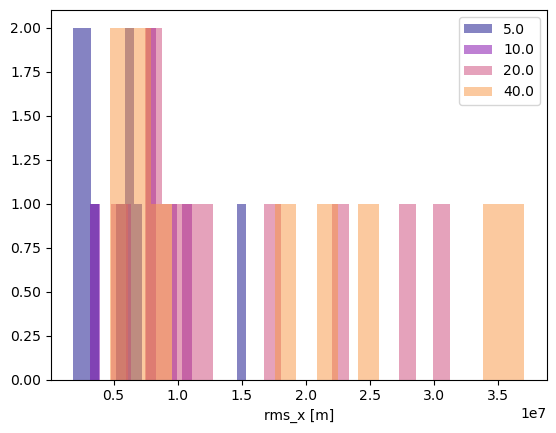

In [9]:
for _T in ds_rms["T"]:
    ds_rms.sel(tau_eta=1).rms_x.sel(T=_T).plot.hist(bins=20, alpha=0.5, label=float(_T))
plt.legend()
plt.title("")

Text(0.5, 1.0, '')

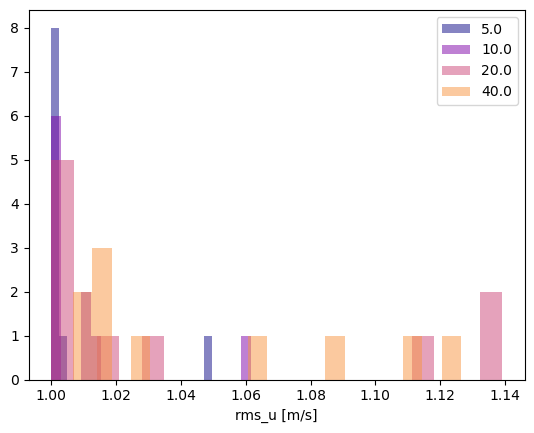

In [9]:
for _T in ds_rms["T"]:
    ds_rms.sel(tau_eta=1).rms_u.sel(T=_T).plot.hist(bins=20, alpha=0.5, label=float(_T))
plt.legend()
plt.title("")

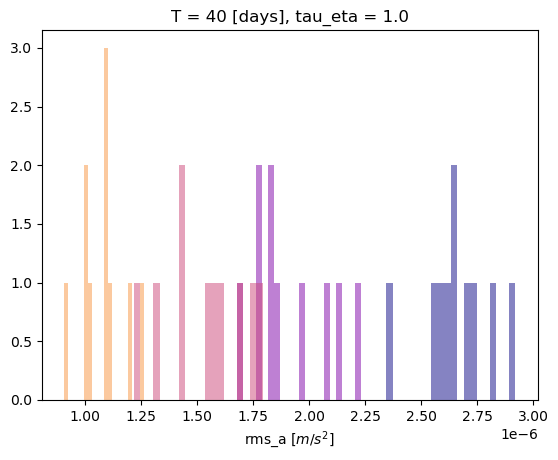

In [10]:
for _T in ds_rms["T"]:
    ds_rms.sel(tau_eta=1).rms_a.sel(T=_T).plot.hist(bins=20, alpha=0.5, label=float(_T))

In [11]:
def plot_ms(ds, suffixes):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
    axes = axes.flatten()
    a = np.arange(0, len(suffixes), 1) * 2.5
    b = a + 1
    # Position ########
    ax = axes[0]
    ax.bar(
        a,
        [ds.rms_x**2] * len(suffixes),
        width=1,
        zorder=3,
        label=r"$\langle \alpha^2 \rangle$",
    )
    ax.bar(
        b,
        [ds["rms_x" + i] ** 2 for i in suffixes],
        width=1,
        zorder=3,
        label=r"$\langle (\alpha + \epsilon_{\alpha})^2  \rangle$",
    )
    ax.bar(
        a,
        [ds["rms_nx" + i] ** 2 for i in suffixes],
        bottom=[ds["rms_x"] ** 2 for i in suffixes],
        width=1,
        zorder=3,
        label=r"$\langle \epsilon_{\alpha}^2  \rangle$",
    )
    ax.set_ylabel(r"$\langle ...^2\rangle$")
    ax.set_title("x[m]")

    # Velocity #########
    ax = axes[1]
    ax.bar(a, [ds.rms_u**2] * len(suffixes), width=1, zorder=3)
    ax.bar(b, [ds["rms_u" + i] ** 2 for i in suffixes], width=1, zorder=3)
    ax.bar(
        a,
        [ds["rms_nu" + i] ** 2 for i in suffixes],
        bottom=[ds["rms_u"] ** 2 for i in suffixes],
        width=1,
        zorder=3,
    )
    #
    # for i in range(len(suffixes)):
    #    ax.axhline(ds['rms_x'+suffixes[i]]**2*2/(3600**2), a[i]-0.5, a[i]+0.5, c='grey', ls='--', label=r'$2/3600^2\langle (x+\epsilon_{x})^2 \rangle$')
    # ax.axhline(ds.rms_x**2 *2/(3600**2), c='grey', ls='--', label=r'$2/3600^2\langle x^2 \rangle$')

    ax.set_ylabel(r"$\langle ...^2\rangle$")
    ax.set_title("u[m/s]")

    # Acceleration #######
    ax = axes[2]
    ax.bar(a, [ds.rms_a**2] * len(suffixes), width=1, zorder=3)
    ax.bar(b, [ds["rms_a" + i] ** 2 for i in suffixes], width=1, zorder=3)
    ax.bar(
        a,
        [ds["rms_na" + i] ** 2 for i in suffixes],
        bottom=[ds["rms_a"] ** 2 for i in suffixes],
        width=1,
        zorder=3,
    )
    ax.set_ylabel(r"$\langle ...^2\rangle$")
    ax.set_title(r"a[$m^2$/s]")

    # for i in range(len(suffixes)):
    #   ax.axhline(ds['rms_u'+suffixes[i]]**2*2/(3600**2), a[i]-0.5, a[i]+0.5, c='grey', ls='--', label=r'$2/3600^2\langle (u+\epsilon_{u})^2 \rangle$')
    # ax.axhline(ds.rms_u**2 *2/(3600**2), c='grey', ls='--', label=r'$2/3600^2\langle u^2 \rangle$')

    for ax in axes:

        def find(str_):
            if "u" in str_:
                return "u"
            if "x" in str_:
                return "dx"

        ax.set_xticks(
            a + 0.5,
            [
                l.replace("_nu", "").replace("_nx", "").replace("0", "0.")
                + r"x $\sigma^2_{"
                + find(l)
                + "}$"
                for l in suffixes
            ],
        )
        ax.grid(axis="y", zorder=0)
        ax.set_xlabel("Added white noise")
    fig.legend(
        bbox_to_anchor=(1, 0),
        loc="lower right",
        bbox_transform=fig.transFigure,
        ncol=3,
        title=r"where $\alpha$ is in x, u or a, $\epsilon_{\alpha}$ the noise",
    )
    fig.tight_layout(
        rect=[0, 0.15, 1, 1]
    )  # left, bottom, right, top (default is 0,0,1,1)

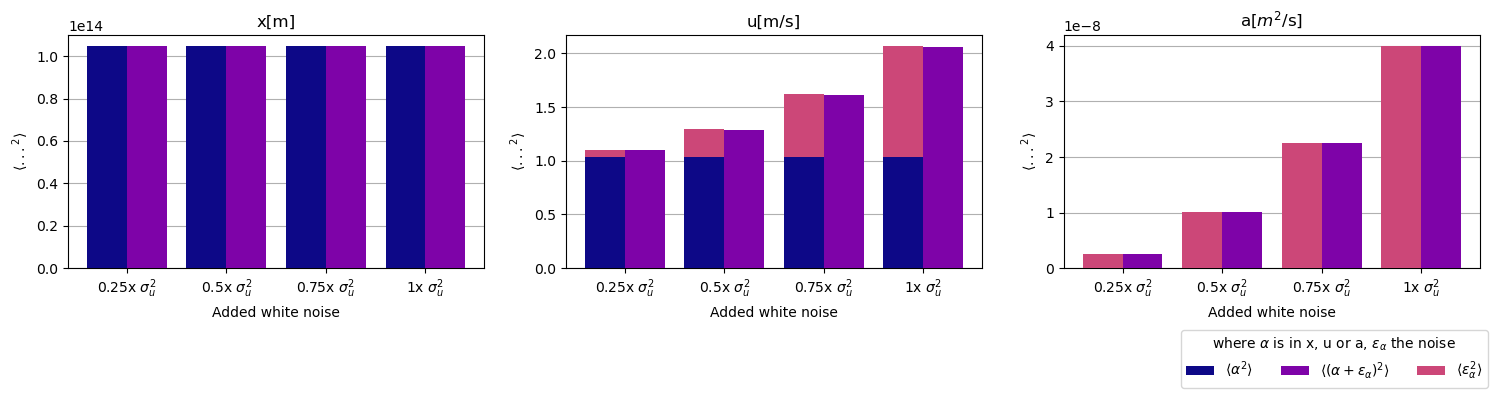

In [12]:
plot_ms(ds_rms.mean("draw").sel(T=20).isel(tau_eta=1), suffixes=suffixes_u)

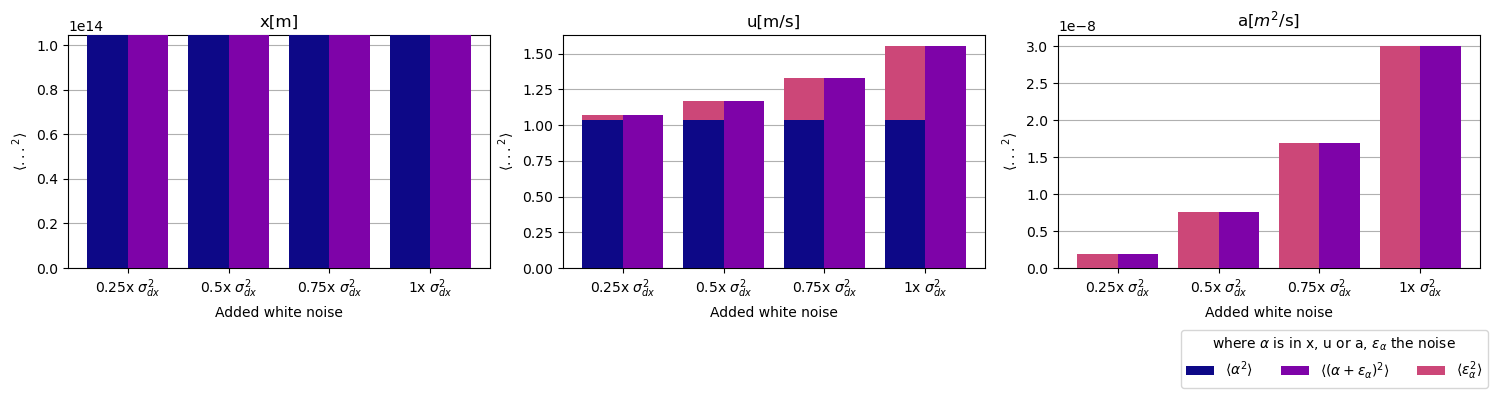

In [13]:
plot_ms(ds_rms.mean("draw").sel(T=20).isel(tau_eta=1), suffixes=suffixes_x)

In [14]:
def plot_ms_ratio(ds, suffixes):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    axes = axes.flatten()
    a = np.arange(0, len(suffixes), 1) * 2.5
    b = a + 1
    # Position ########
    ax = axes[0]
    d = [
        (ds.rms_x**2 + ds["rms_nx" + i] ** 2) / ds["rms_x" + i] ** 2 for i in suffixes
    ]
    ax.bar(
        a, d, width=2, zorder=3
    )  # , label = r'$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/(\langle (\alpha +\epsilon_{\alpha})^2 \rangle $')
    for i in range(len(d)):
        ax.text(
            a[i] - 1, d[i] + 1e-2, str(np.format_float_scientific(d[i], precision=3))
        )
    ax.axhline(1, color="r")
    ax.set_ylabel(
        r"$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/\langle (\alpha +\epsilon_{\alpha})^2 \rangle $"
    )
    ax.set_title("x[m]")
    ax.set_ylim(0.9, 1.1)

    # Velocity #########
    ax = axes[1]
    d = [
        (ds.rms_u**2 + ds["rms_nu" + i] ** 2) / ds["rms_u" + i] ** 2 for i in suffixes
    ]
    ax.bar(
        a, d, width=2, zorder=3
    )  # , label = r'$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/(\langle (\alpha +\epsilon_{\alpha})^2 \rangle $')
    for i in range(len(d)):
        ax.text(
            a[i] - 1, d[i] + 1e-2, str(np.format_float_scientific(d[i], precision=3))
        )
    ax.axhline(1, color="r")
    ax.set_ylabel(
        r"$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/\langle (\alpha +\epsilon_{\alpha})^2 \rangle $"
    )
    ax.set_title("u[m/s]")

    # Acceleration #######
    ax = axes[2]
    d = [
        (ds.rms_u**2 + ds["rms_nu" + i] ** 2) / ds["rms_u" + i] ** 2 for i in suffixes
    ]
    ax.bar(
        a, d, width=2, zorder=3
    )  # , label = r'$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/(\langle (\alpha +\epsilon_{\alpha})^2 \rangle $')
    for i in range(len(d)):
        ax.text(
            a[i] - 1, d[i] + 1e-2, str(np.format_float_scientific(d[i], precision=3))
        )
    ax.axhline(1, color="r")
    ax.set_ylabel(
        r"$ ( \langle \alpha^2 \rangle + \langle \epsilon_{\alpha}^2 \rangle )/\langle (\alpha +\epsilon_{\alpha})^2 \rangle $"
    )
    ax.set_title(r"a[$m^2$/s]")

    for ax in axes:

        def find(str_):
            if "u" in str_:
                return "u"
            if "x" in str_:
                return "dx"

        ax.set_xticks(
            a + 0.5,
            [
                l.replace("_nu", "").replace("_nx", "").replace("0", "0.")
                + r"x $\sigma^2_{"
                + find(l)
                + "}$"
                for l in suffixes
            ],
        )
        ax.grid(axis="y", zorder=0)
        ax.set_xlabel("Added white noise")
    # fig.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3,title=r"where $\alpha$ is in x, u or a, $\epsilon_{\alpha}$ the noise",)
    fig.tight_layout(
        rect=[0, 0.15, 1, 1]
    )  # left, bottom, right, top (default is 0,0,1,1)

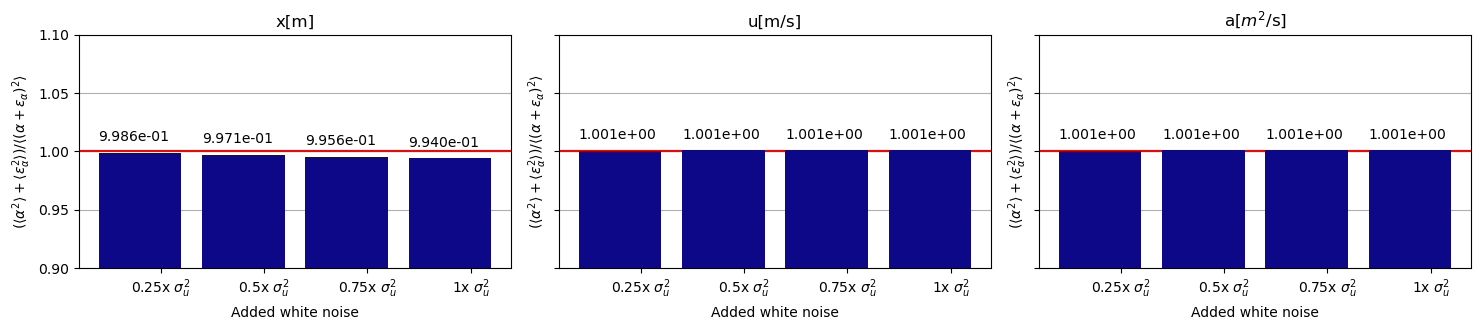

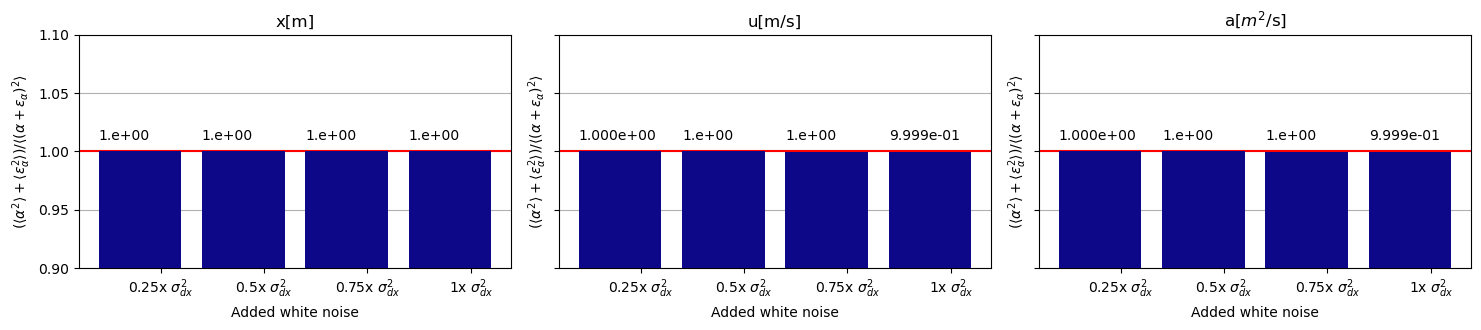

In [15]:
plot_ms_ratio(ds_rms.mean("draw").sel(T=5).sel(tau_eta=1), suffixes=suffixes_u)
plot_ms_ratio(ds_rms.mean("draw").sel(T=5).sel(tau_eta=1), suffixes=suffixes_x)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=10).sel(tau_eta=1), suffixes=suffixes_u)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=10).sel(tau_eta=1), suffixes=suffixes_x)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=20).sel(tau_eta=1), suffixes=suffixes_u)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=20).sel(tau_eta=1), suffixes=suffixes_x)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=40).sel(tau_eta=1), suffixes=suffixes_u)
# plot_ms_ratio(ds_rms.mean("draw").sel(T=40).sel(tau_eta=1), suffixes=suffixes_x)

____
# Effect of derivation on mean square
We have :

$\langle u^2 \rangle = \frac{(1-C_x(2*dt))}{2dt^2}\langle x^2 \rangle $ and $\langle a^2 \rangle = \frac{(1-C_u(2*dt))}{2dt^2}\langle u^2 \rangle $

Let's study :

$\gamma_u = \frac{(1-C_x(2dt))}{2dt^2}\frac{\langle x^2 \rangle}{\langle u^2 \rangle}$ and $\gamma_a = \frac{(1-C_u(2dt))}{2dt^2}\frac{\langle u^2 \rangle}{\langle a^2 \rangle}$

Do they tend to 1 ?

In [20]:
def cpte_gamma_nu(ds, ds_rms, suf, dt=3600):
    u2 = ds["Enu" + suf].integrate("freq_time")  # ds_rms["rms_nu" + suf] ** 2
    x2 = ds["Enx" + suf].integrate("freq_time")  # ds_rms["rms_nx" + suf] ** 2
    # print(x2, u2)
    cx = ds["nxnx" + suf].sel(lags=2 / 24)  # non normalized
    print(cx.values, x2.values)
    return (x2 - cx) / (2 * dt**2) / u2


def cpte_gamma_na(ds, ds_rms, suf, dt=3600):
    a2 = ds["Ena" + suf].integrate("freq_time")  # ds_rms["rms_na" + suf] ** 2
    u2 = ds["Enu" + suf].integrate("freq_time")  # ds_rms["rms_nu" + suf] ** 2
    cu = ds["nunu" + suf].sel(lags=2 / 24)  # non normalized
    print(cu.values, u2.values)
    return (u2 - cu) / (2 * dt**2) / a2

In [21]:
def cpte_gamma_u(ds, ds_rms, suf, dt=3600):
    u2 = ds_rms["rms_u" + suf] ** 2
    x2 = ds_rms["rms_x" + suf] ** 2
    # print(x2, u2)
    cx = ds["xx" + suf].sel(lags=2 / 24)  # non normalized
    return (x2 - cx) / (2 * dt**2) / u2


def cpte_gamma_a(ds, ds_rms, suf, dt=3600):
    a2 = ds_rms["rms_a" + suf] ** 2
    u2 = ds_rms["rms_u" + suf] ** 2
    cu = ds["uu" + suf].sel(lags=2 / 24)  # non normalized
    return (u2 - cu) / (2 * dt**2) / a2

In [25]:
ds_gamma_u = cpte_gamma_u(ds.sel(tau_eta=1), ds_rms, "_nx025")
ds_gamma_a = cpte_gamma_a(ds.sel(tau_eta=1), ds_rms, "_nx025")
ds_gamma_nu = cpte_gamma_nu(ds.sel(tau_eta=1), ds_rms, "_nx025")
ds_gamma_na = cpte_gamma_na(ds.sel(tau_eta=1), ds_rms, "_nx025")

[[ 4256.39140848 -3098.13395435 -1666.77950418  2282.25585295
   -277.5851287   2324.86027926  2410.42348113  4295.34402658
   7317.86156324  -166.71796895]
 [-3843.16997012  2522.31177257 -1925.50145706  4181.27519304
  -6934.28579924 -5922.97796134 -2922.96194482  5667.77121869
  -1607.72440294   181.1879315 ]
 [ 6361.44545292 -2446.82279461  5266.70451905  4907.81956412
  -6402.86346319 -7295.55768298    43.34969894 -3985.24199625
  -4250.21541225  4351.45876701]
 [ 7271.27339693  7345.32389216  -987.64970672  -212.20710701
   1365.4847328  -3296.18796966 -2092.62468892  1511.27454516
   4891.51304535   440.89959751]] [[833358.00243749 840537.91055581 844549.62175577 823352.76213287
  834237.83067934 848555.99694808 840850.78647516 832444.27718487
  842402.78917361 841670.84998482]
 [840781.18598778 839090.65009539 838103.58753877 854302.43690643
  851958.10081247 814872.35525416 838825.72930339 835434.86161281
  839915.1539034  837523.49463186]
 [848674.64976596 835705.46083326 832

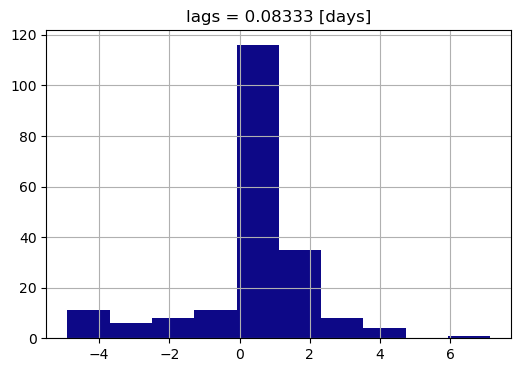

In [26]:
ds_gamma_a.plot.hist(figsize=(6, 4))
plt.grid()

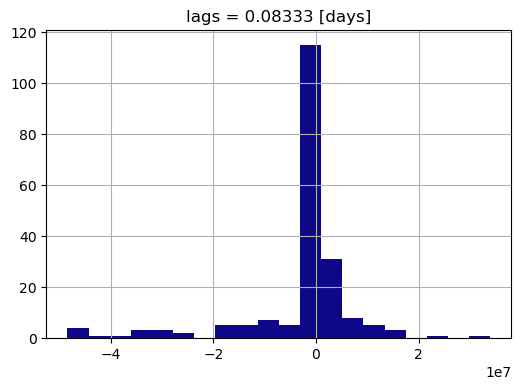

In [27]:
ds_gamma_u.plot.hist(figsize=(6, 4), bins=20)
plt.grid()

##### CCL :  Work well for $\langle a^2\rangle$ but not for $\langle u^2\rangle$ -> the autocorrelation ahs its importance ! 
$x$ is here computed from the integration of $u$ (and not $u$ derivated from $x$ here), so this expression may do not apply.


## Integration effect on mean square
Not trivial, and in GDP analysis we go from $x$ to $u$, so may be not relevant

________________
# Noised trajectories

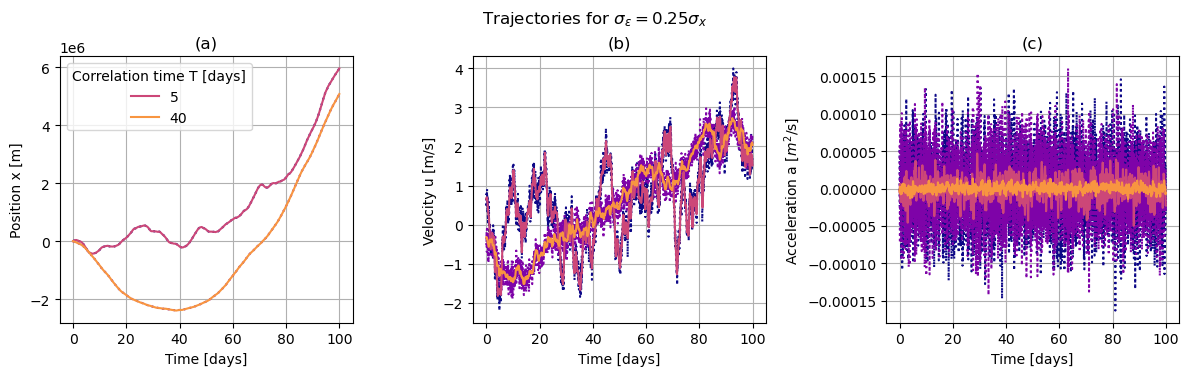

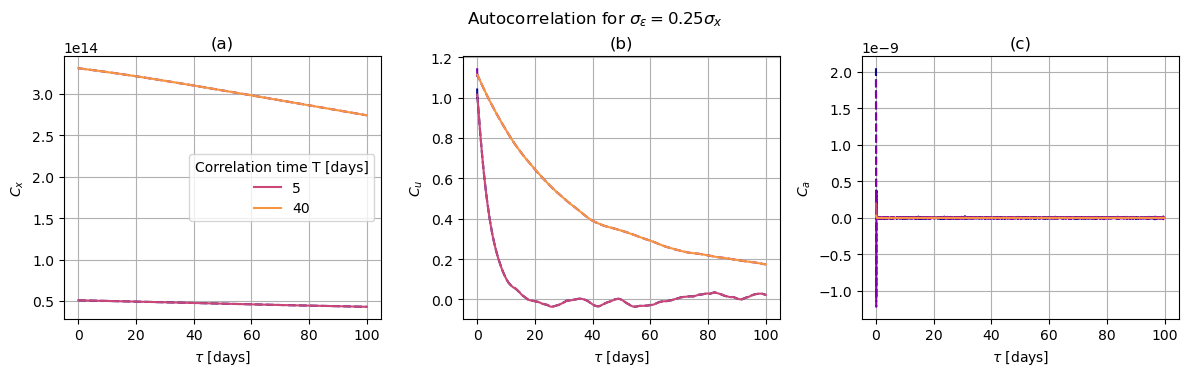

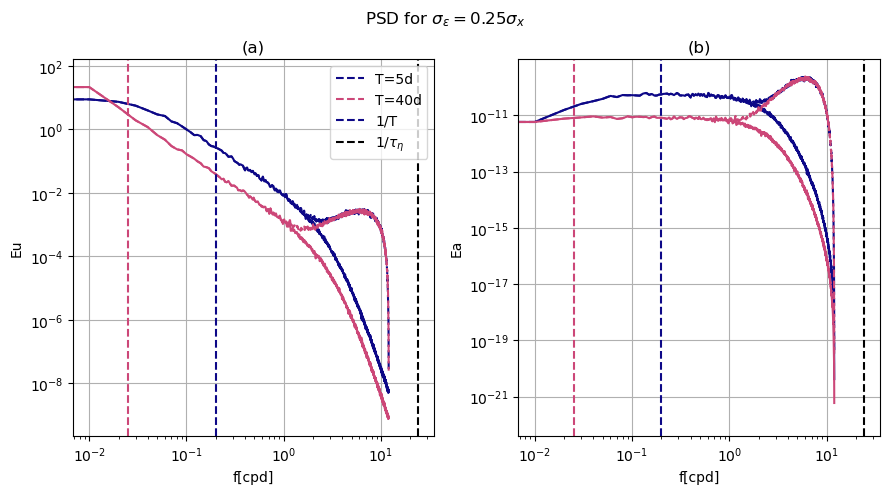

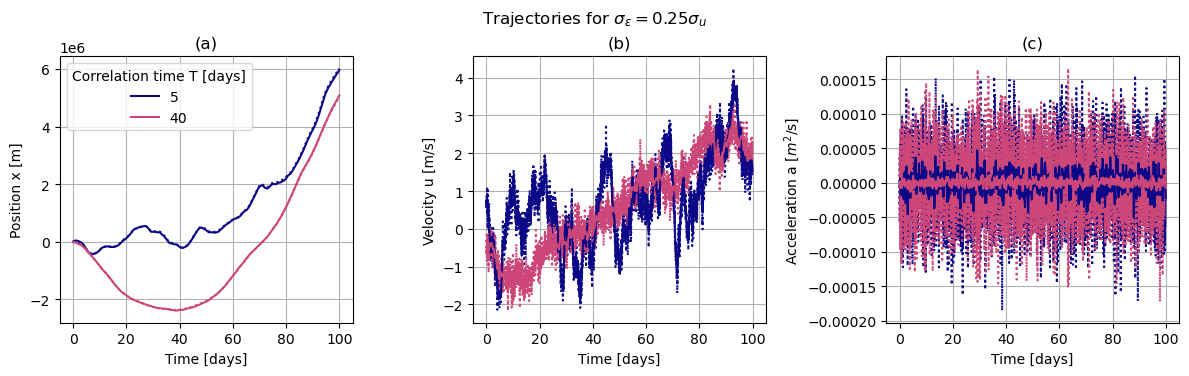

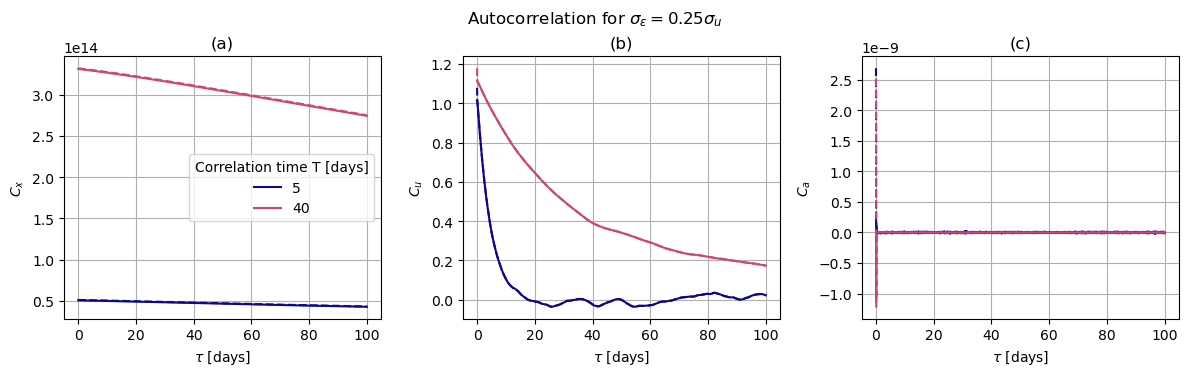

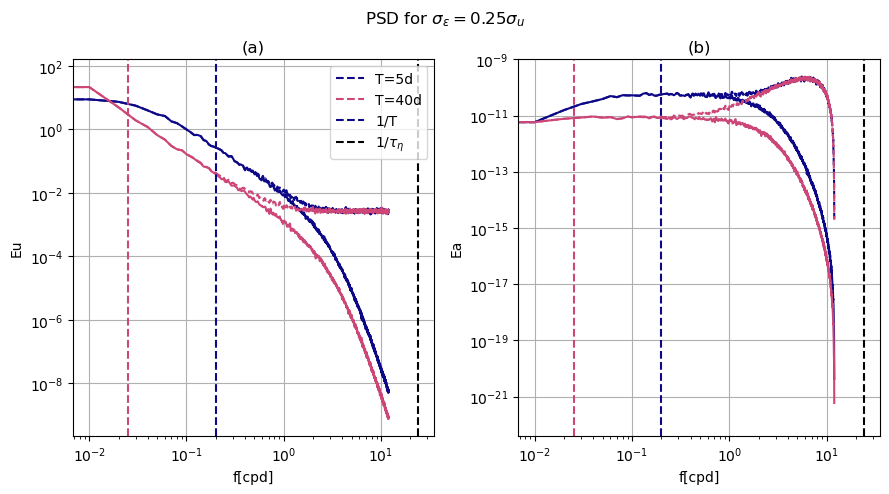

In [55]:
n1 = "_nx025"
n2 = "_nu025"


def plot_stat(ds, n1, ts=False, autocor=False, spectra=True, all_=False):
    suffixes_leg = ds.attrs["noise_suffixes_legend"]
    if all_:
        ts = (True,)
        autocor = True
        spectra = True
    if ts:
        fplt.plot_timeseries(
            ds.isel(draw=2),
            suffixes_ls={
                n1: "dotted",
                "": "solid",
            },
            suffixes_leg=suffixes_leg[n1],
            title="Trajectories for " + suffixes_leg[n1],
        )
    if autocor:
        fplt.plot_autocorrelations(
            ds.mean("draw"),
            tau_max=100,
            suffixes_ls={
                n1: "dashed",
                "": "solid",
            },
            suffixes_leg=suffixes_leg[n1],
            title="Autocorrelation for " + suffixes_leg[n1],
        )
    if spectra:
        fplt.plot_psd(
            ds,
            suffixes_ls={
                n1: "dashed",
                "": "solid",
            },
            suffixes_leg=suffixes_leg,
            title="PSD for " + suffixes_leg[n1],
        )


plot_stat(ds.isel(T=[0, 3], tau_eta=1), n1, all_=True)
plot_stat(ds.isel(T=[0, 3], tau_eta=1), n2, all_=True)

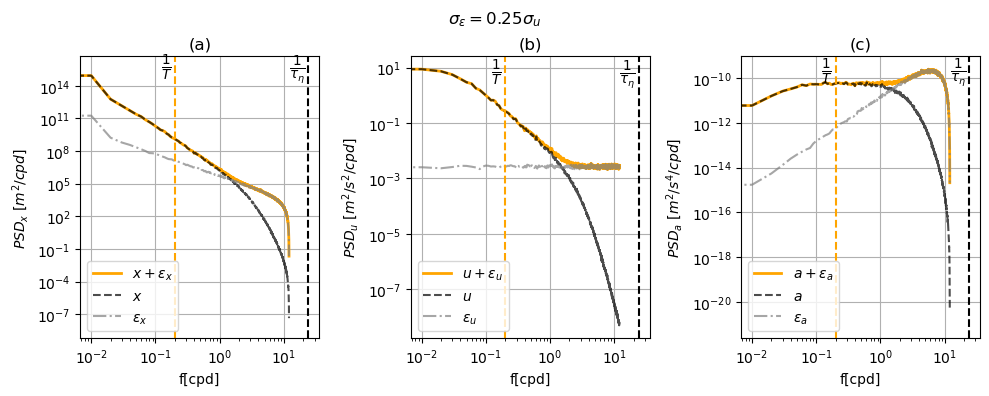

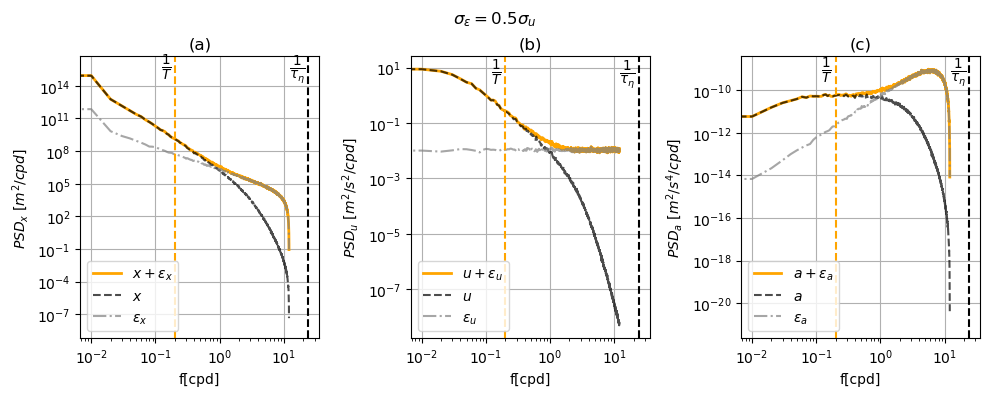

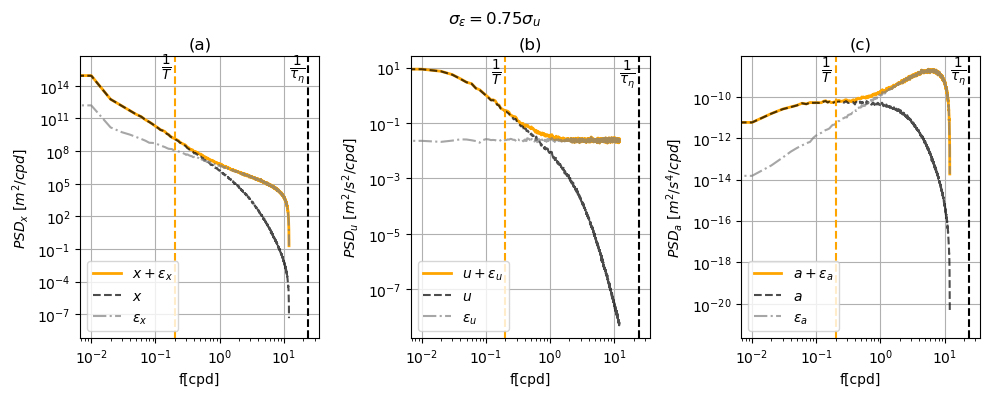

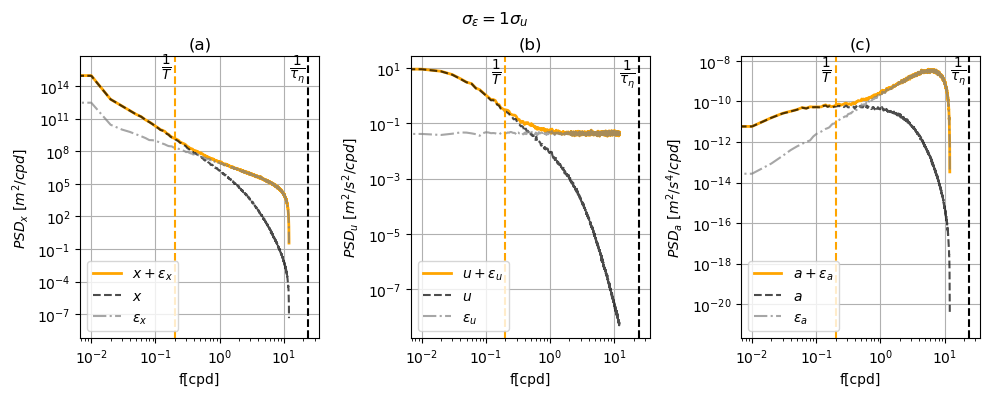

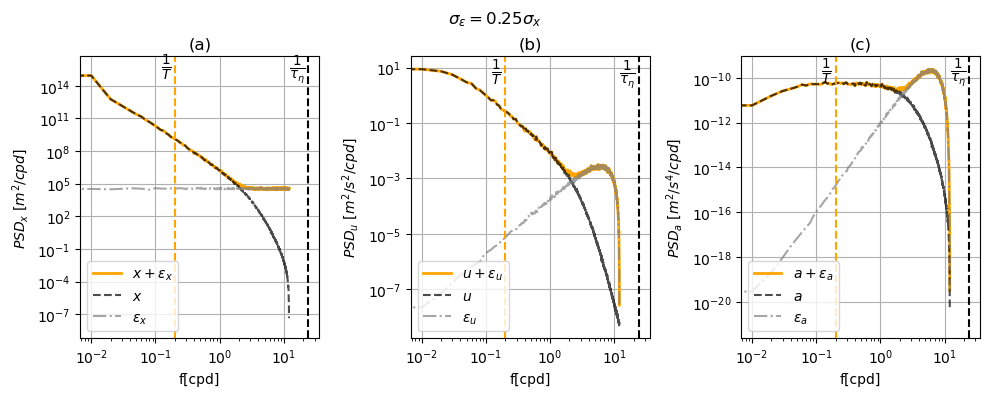

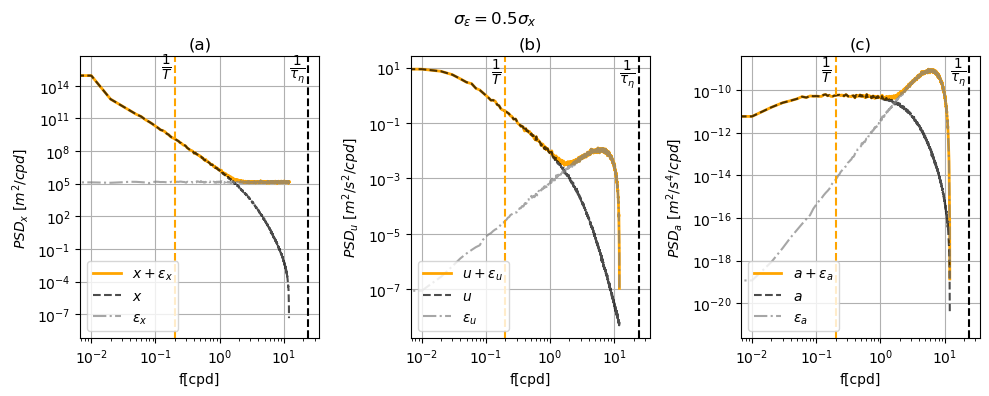

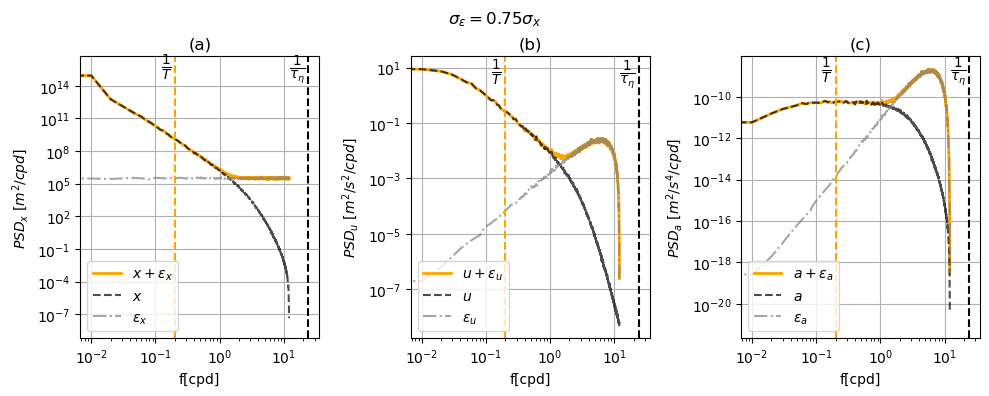

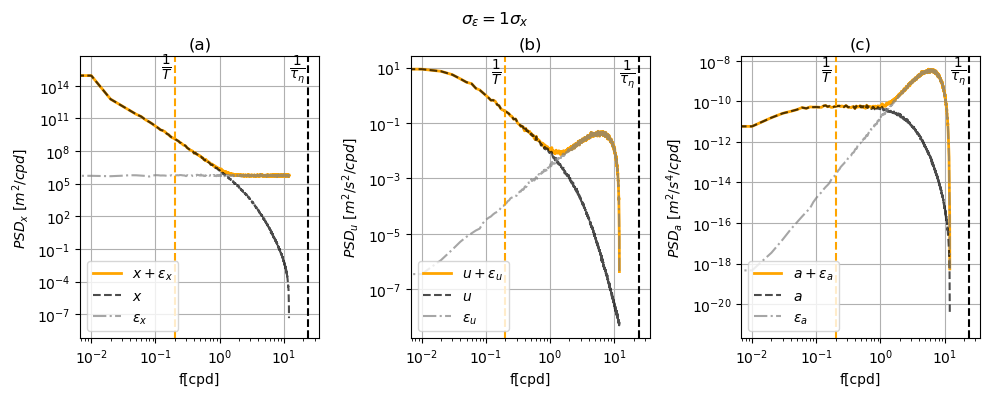

In [56]:
def plot_psd(ds, suf, c="orange"):
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # , sharey=True)

    ax = axs[0]
    ds["Ex" + suf].mean("draw").plot(
        x="freq_time", ax=ax, lw=2, color=c, label=r"$x+\epsilon_x$"
    )
    ds["Ex"].mean("draw").plot(
        x="freq_time", ax=ax, color="k", ls="--", alpha=0.7, label=r"$x$"
    )
    ds["Enx" + suf].mean("draw").plot(
        x="freq_time", ax=ax, color="grey", ls="-.", alpha=0.7, label=r"$\epsilon_x$"
    )
    # (ds['Enx'+suf]+ds['Ex']).mean("draw").plot(x="freq_time", ax=ax, color='b', ls ='-.',alpha=0.7, label=r"$\epsilon_x$")#verification sum PSD
    ax.set_title("(a)")
    ax.set_ylabel(r"$PSD_x$ $[m^2/cpd]$")

    ax = axs[1]
    ds["Eu" + suf].mean("draw").plot(
        x="freq_time", ax=ax, lw=2, color=c, label=r"$u+\epsilon_u$"
    )
    ds["Eu"].mean("draw").plot(
        x="freq_time", ax=ax, color="k", ls="--", alpha=0.7, label=r"$u$"
    )
    ds["Enu" + suf].mean("draw").plot(
        x="freq_time", ax=ax, color="grey", ls="-.", alpha=0.7, label=r"$\epsilon_u$"
    )
    ax.set_title("(b)")
    ax.set_ylabel(r"$PSD_u$ $[m^2/s^2/cpd]$")

    ax = axs[2]
    ds["Ea" + suf].mean("draw").plot(
        x="freq_time", ax=ax, lw=2, color=c, label=r"$a+\epsilon_a$"
    )
    ds["Ea"].mean("draw").plot(
        x="freq_time", ax=ax, color="k", ls="--", alpha=0.7, label=r"$a$"
    )
    ds["Ena" + suf].mean("draw").plot(
        x="freq_time", ax=ax, color="grey", alpha=0.7, ls="-.", label=r"$\epsilon_a$"
    )
    ax.set_title("(c)")
    ax.set_ylabel(r"$PSD_a$ $[m^2/s^4/cpd]$")

    # Vertical limitation
    for ax in axs:
        ax.axvline(x=1 / ds.T, color=c, ls="--")
        if "tau_eta" in list(ds.coords):
            ax.axvline(
                1 / ds.tau_eta,
                color="k",
                ls="--",
            )
            over_tau_eta = 1 / ds.tau_eta
        elif "tau_eta_days" in list(ds.attrs):
            ax.axvline(
                1 / ds.attrs["tau_eta_days"],
                color="k",
                ls="--",
            )
            over_tau_eta = 1 / ds.attrs["tau_eta_days"]
        lim = ax.get_ylim()
        ax.annotate(
            r"$\frac{1}{T}$",
            (1 / ds.T - 0.08, lim[1] - (lim[1] - lim[0]) * 0.5),
            fontsize=14,
        )
        ax.annotate(
            r"$\frac{1}{\tau_{\eta}}$",
            (over_tau_eta - 12, lim[1] - (lim[1] - lim[0]) * 0.5),
            fontsize=14,
        )
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlabel("f[cpd]")
        ax.legend(loc="lower left")
        ax.grid()

    fig.tight_layout(
        rect=[0, 0, 1, 0.95]
    )  # left, bottom, right, top (default is 0,0,1,1)
    suffixes_leg = ds.attrs["noise_suffixes_legend"]
    fig.suptitle(suffixes_leg[suf])

    return fig, axs


suffixes_leg = ds.attrs["noise_suffixes_legend"]
for suf in suffixes_leg:
    plot_psd(ds.isel(T=0, tau_eta=1), suf);

____
# Parseval on noise

In [28]:
suf = "_nu05"
ds["Enu" + suf].integrate("freq_time").mean("draw").compute()  # =0.5**2 -> Ok

<xarray.DataArray 'Enu_nu05' (T: 4)>
array([0.25875803, 0.25903113, 0.25822136, 0.25830434])
Coordinates:
  * T        (T) int64 5 10 20 40

____
# Variance of noise on u $\langle \epsilon_u^2 \rangle $ depending on $\langle \epsilon_x^2 \rangle $ 

In case the white noise is added to position ($\epsilon_x$ is a white noise), the $\epsilon_u$ is computed via the 2nd order accurate central derivation of $\epsilon_x$ (via xarray.Dataset.differentiate()) and we should have : 
$$\langle \epsilon_u^2 \rangle =\langle (\frac{\epsilon_x(t+dt)-\epsilon_x(t-dt)}{2dt})^2 \rangle = \frac{\langle \epsilon_x^2 \rangle-2C_{\epsilon_x}(dt)}{2dt^2} = \frac{\langle \epsilon_x^2 \rangle}{2dt^2} $$
The same relation also exist between $\langle \epsilon_a^2 \rangle$ and $\langle \epsilon_u^2 \rangle$.
Let's verify that we have this integrating PSD to get $\langle -^2 \rangle$

In [29]:
def verify_var_noise(ds, suf):
    varnx_psd = ds["Enx" + suf].mean("draw").integrate("freq_time").values
    varnu_calcul = varnx_psd / (2 * 3600**2)
    varnu_psd = ds["Enu" + suf].mean("draw").integrate("freq_time").values
    # varna_calcul = varnu_psd/(2*3600**2)
    varna_calcul = 3 * varnx_psd / (8 * (3600**4))
    varna_psd = ds["Ena" + suf].mean("draw").integrate("freq_time").values
    return varnu_calcul / varnu_psd, varna_calcul / varna_psd


verify_var_noise(ds, "_nx025")

(array([1.00059361, 0.99918228, 1.00059345, 1.00250656]),
 array([1.00130103, 0.99881675, 1.00017219, 1.00429389]))

____
# Autocorreletion of noise  

In case the white noise is added to position ($\epsilon_x$ is a white noise, $C_{\epsilon_x}(\tau) = \delta_0 \langle \epsilon_x^2 \rangle $), the $\epsilon_u$ is computed via the 2nd order accurate central derivation of $\epsilon_x$ (via xarray.Dataset.differentiate()) and we should have : 
$$ C_{\epsilon_u}(\tau) = \frac{2\delta(\tau)-\delta(\tau-2dt)}{4dt^2}\langle \epsilon_x^2 \rangle $$
$$ C_{\epsilon_a}(\tau) = \frac{6\delta(\tau)-3\delta(\tau-2dt)+\delta(\tau-4dt)}{16dt^4}\langle \epsilon_x^2 \rangle$$

Let's verify this :

X
3354522.7592631513 3354256.6533968984
-6076.3134150142705 10411.580073702098
7071.168022188454 3461.359988806647
68795.6484039029 70728.10417883731
U
0.12917214232939547 0.12927450898465975
-0.00018171836026428925 0.00026131192763430874
-0.06434890422136832 -0.06449996172391158
-9.292345064665181e-06 -3.8579163468466015e-06
A
7.466065892916593e-09 7.475878258976177e-09
-6.056477665406789e-12 6.476982335215094e-12
-4.965684120064154e-09 -4.976742393026055e-09
-3.8302054208495533e-13 -2.345221727212203e-13


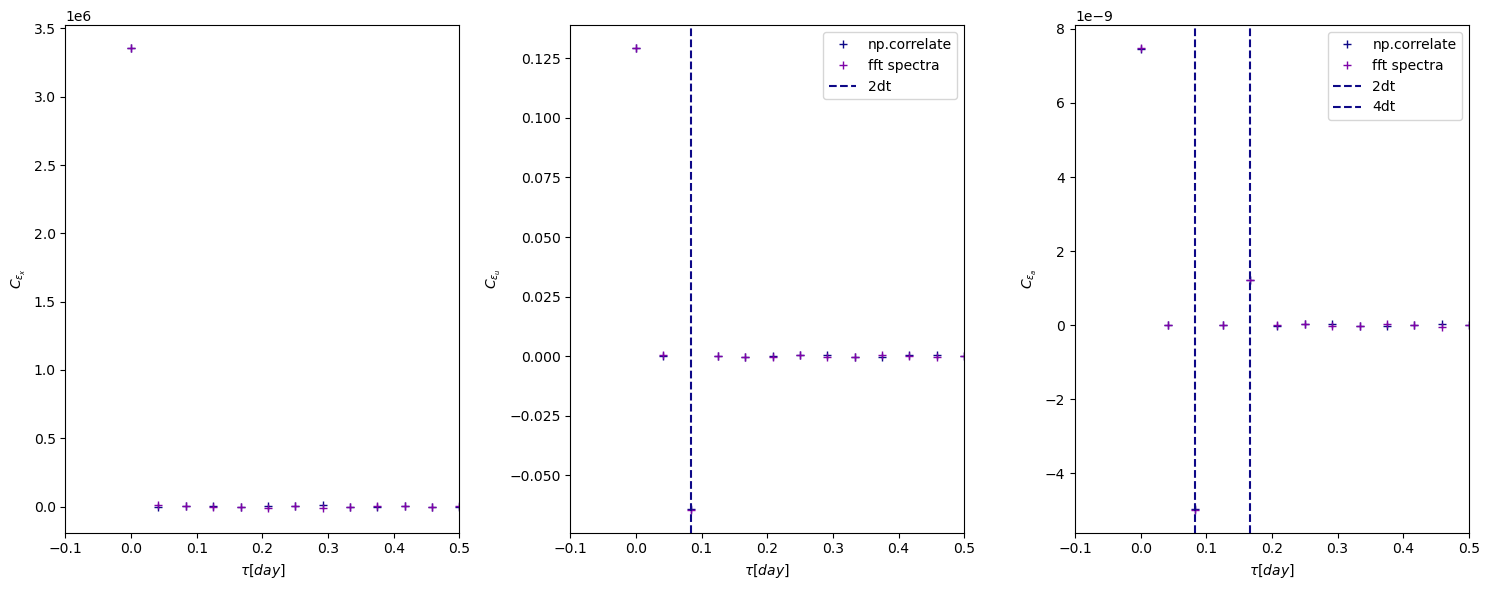

In [37]:
suf = "_nx05"

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True)
axes = axes.flatten()

ax = axes[0]
ds_ = ds.sel(tau_eta=1).isel(T=0)
fft = np.fft.fft(ds_["Enx" + suf].mean("draw"))
freq = np.fft.fftfreq(fft.size, 0.01)
C = (
    xr.DataArray(data=fft, coords={"lags": freq}, dims=["lags"]).sortby("lags").real
    / 100
)  # normalisation
C = C.where(C.lags >= 0, drop=True)
C_ = ds.nxnx_nx05.isel(T=0).mean("draw").sel(lags=C.lags)
print("X")
print(float(C_.sel(lags=0).compute()), float(C.sel(lags=0).compute()))
print(float(C_.sel(lags=1 / 24).compute()), float(C.sel(lags=1 / 24).compute()))
print(float(C_.sel(lags=2 / 24).compute()), float(C.sel(lags=2 / 24).compute()))
print(float(C_.integrate("lags").compute()), float(C.integrate("lags").compute()))

C_.plot(ls="", marker="+", ax=ax)
C.plot(ls="", marker="+", ax=ax)
ax.set_xlim(-0.1, 0.5)
ax.set_xlabel(r"$\tau [day]$")
ax.set_ylabel(r"$C_{\epsilon_x}$")

ax = axes[1]
ds_ = ds.sel(tau_eta=1).isel(T=0)
fft = np.fft.fft(ds_["Enu" + suf].mean("draw"))
freq = np.fft.fftfreq(fft.size, 0.01)
C = (
    xr.DataArray(data=fft, coords={"lags": freq}, dims=["lags"]).sortby("lags").real
    / 100
)
C = C.where(C.lags >= 0, drop=True)
C_ = ds.nunu_nx05.isel(T=0).mean("draw").sel(lags=C.lags)
print("U")
print(float(C_.sel(lags=0).compute()), float(C.sel(lags=0).compute()))
print(float(C_.sel(lags=1 / 24).compute()), float(C.sel(lags=1 / 24).compute()))
print(float(C_.sel(lags=2 / 24).compute()), float(C.sel(lags=2 / 24).compute()))
print(float(C_.integrate("lags").compute()), float(C.integrate("lags").compute()))
C_.plot(ls="", marker="+", label="np.correlate", ax=ax)
C.plot(ls="", marker="+", label="fft spectra", ax=ax)
ax.axvline(1 / 24 * 2, ls="--", label="2dt")  # 2dt
ax.set_xlim(-0.1, 0.5)
ax.set_xlabel(r"$\tau [day]$")
ax.set_ylabel(r"$C_{\epsilon_u}$")
ax.legend()

ax = axes[2]
ds_ = ds.sel(tau_eta=1).isel(T=0)
fft = np.fft.fft(ds_["Ena" + suf].mean("draw"))
freq = np.fft.fftfreq(fft.size, 0.01)
C = (
    xr.DataArray(data=fft, coords={"lags": freq}, dims=["lags"]).sortby("lags").real
    / 100
)
C = C.where(C.lags >= 0, drop=True)
print("A")
C_ = ds.nana_nx05.isel(T=0).mean("draw").sel(lags=C.lags)
print(float(C_.sel(lags=0).compute()), float(C.sel(lags=0).compute()))
print(float(C_.sel(lags=1 / 24).compute()), float(C.sel(lags=1 / 24).compute()))
print(float(C_.sel(lags=2 / 24).compute()), float(C.sel(lags=2 / 24).compute()))
print(float(C_.integrate("lags").compute()), float(C.integrate("lags").compute()))

C_.plot(ls="", marker="+", label="np.correlate", ax=ax)
C.plot(ls="", marker="+", label="fft spectra", ax=ax)
ax.axvline(1 / 24 * 2, ls="--", label="2dt")  # 2dt
ax.axvline(1 / 24 * 4, ls="--", label="4dt")  # 4dt
ax.set_xlim(-0.1, 0.5)
ax.set_xlabel(r"$\tau [day]$")
ax.set_ylabel(r"$C_{\epsilon_a}$")
ax.legend()

fig.tight_layout()

The PSDs should thus be sinusoïds with period 1/2dt for velocity and 1/2dt and 1/4dt for acceleration

____
# Total spectra

In [56]:
def sum_posneg_spectra(ds, freqkey="freq_time"):
    ds_inv = ds.sortby("freq_time", ascending=False)
    ds_neg = ds_inv.where(ds_inv[freqkey] <= 0, drop=True)
    ds_neg[freqkey] = -ds_neg[freqkey]
    ds_pos = ds.where(ds[freqkey] >= 0, drop=True)

    return ds_neg, ds_pos


ds_neg, ds_pos = sum_posneg_spectra(ds.mean("draw"))
dstot = ds_neg + ds_pos

/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


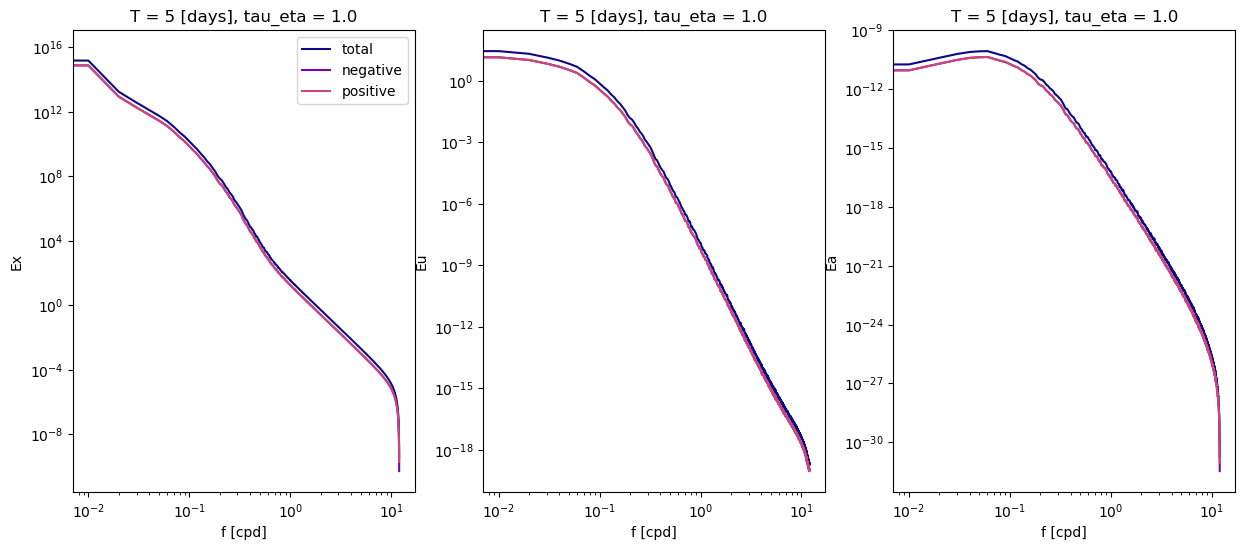

In [66]:
suf = ""
ds_ = ds.sel(tau_eta=1, T=5).mean("draw")
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True)
axes = axes.flatten()

ax = axes[0]
dstot["Ex" + suf].sel(tau_eta=1, T=5).plot(ax=ax, label="total")
ds_neg["Ex" + suf].sel(tau_eta=1, T=5).plot(ax=ax, label="negative")
ds_pos["Ex" + suf].sel(tau_eta=1, T=5).plot(ax=ax, label="positive")
# (ds.freq_time**2).plot(ls=':', color='grey', label='+2')

ax = axes[1]
# (ds.freq_time**2).plot(ls=':', color='grey', label='+2', ax=ax)
dstot["Eu" + suf].sel(tau_eta=1, T=5).plot(ax=ax)
ds_neg["Eu" + suf].sel(tau_eta=1, T=5).plot(ax=ax)
ds_pos["Eu" + suf].sel(tau_eta=1, T=5).plot(ax=ax)

ax = axes[2]
# (ds.freq_time**4).plot(ls=':', color='grey', label='+4', ax=ax)
dstot["Ea" + suf].sel(tau_eta=1, T=5).plot(ax=ax)
ds_neg["Ea" + suf].sel(tau_eta=1, T=5).plot(ax=ax)
ds_pos["Ea" + suf].sel(tau_eta=1, T=5).plot(ax=ax)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
axes[0].legend()

___
# Analytic PSD fits

In [39]:
def psd_white_noise(freq, stdx):
    return xr.ones_like(freq) * stdx**2 / (freq.max() - freq.min())


def psd_centered_der(psd, freq="freq_time"):
    """Return the PSD of the centered derivative giving the PSD of a variable (take PSD of x return PSD of v for a centered derivation
    psd : dataarray
        contains psd
    freq: str or array
        the key of frequencies in dataarray or the frequency array
    """
    if isinstance(freq, str):
        dt = 1 / 24
        freq = psd[freq]
    else:
        dt = 1 / 24

    return np.sin(2 * np.pi * freq * dt) ** 2 / (dt * 86400) ** 2 * psd


def psd_uncentered_der(psd, freq="freq_time"):
    """Return the PSD of the uncentered derivative giving the PSD of a variable (take PSD of x return PSD of v for a centered derivation
    psd : dataarray
        contains psd
    freq: str or array
        the key of frequencies in dataarray or the frequency array
    """
    if isinstance(freq, str):
        dt = 1 / 24
        freq = psd[freq]
    else:
        dt = 1 / 24

    return (1 - np.cos(2 * np.pi * freq * dt)) / (dt * 86400) ** 2 * psd

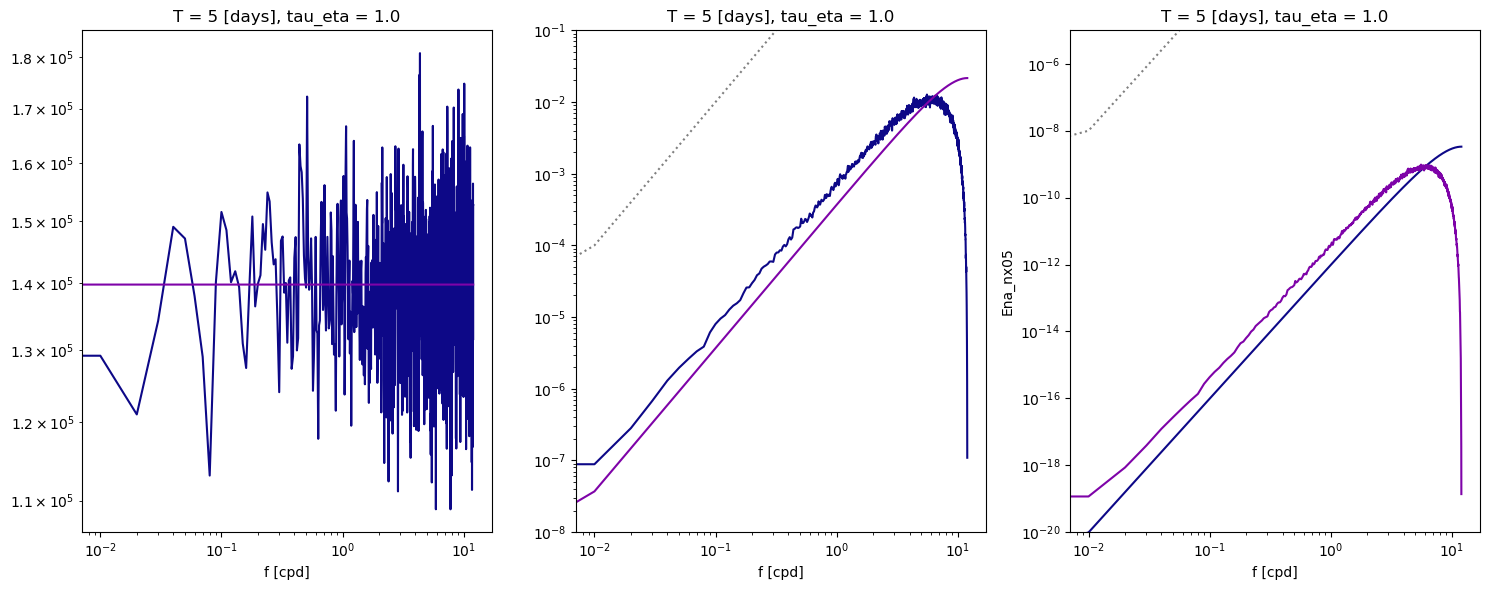

In [40]:
suf = "_nx05"
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharex=True)
axes = axes.flatten()
ds_ = ds.sel(T=5, tau_eta=1)
freq = ds.freq_time
PSDx = psd_white_noise(freq, ds_["nx" + suf].std().compute())
PSDu = psd_uncentered_der(PSDx)
PSDa = psd_uncentered_der(PSDu)

ax = axes[0]
ds_["Enx" + suf].mean("draw").plot(ax=ax)
PSDx.plot(ax=ax)

ax = axes[1]
(ds_.freq_time**2).plot(ls=":", color="grey", label="+2", ax=ax)
ds_["Enu" + suf].mean("draw").plot(ax=ax)
PSDu.plot(ax=ax)
ax.set_ylim(1e-8, 1e-1)

ax = axes[2]
(ds_.freq_time**4).plot(ls=":", color="grey", label="+4", ax=ax)
PSDa.plot(ax=ax)
ds_["Ena" + suf].mean("draw").plot(ax=ax)
ax.set_ylim(1e-20, 1e-5)

for ax in axes:
    ax.set_xscale("log")
    ax.set_yscale("log")
fig.tight_layout()

In [6]:
cluster.close()

/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:237: FutureWarning: extra has been renamed to worker_extra_args. You are still using it (even if only set to []; please also check config files). If you did not set worker_extra_args yet, extra will be respected for now, but it will be removed in a future release. If you already set worker_extra_args, extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.miniconda3/envs/mdenv/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/home1/datahome/mdemol/.min